# SciPy

SciPy, or Scientific Python, is an open source library for scientific computation which provides a large number of functions for scientific purposes like, integration, optimisation, linear algebra, signal processing, fourier transforms and more.

## Integration and ODE
SciPy has built-in functions to calculate integrals

In [1]:
import numpy as np 
import scipy.integrate as integrate
result = integrate.quad(lambda x:np.exp(-x*x), 0, np.inf) #this returns the evaluated integral and an estimate of the error
print(result, np.sqrt(np.pi)/2)

(0.8862269254527579, 7.101318390915439e-09) 0.8862269254527579


dblquad() and tplquad() are used to evaluate double and triple integrals respectively.

In [2]:
from scipy.integrate import dblquad,tplquad
area = dblquad(lambda x, y: 1, 0,2,4,6)
print(area)

vol = tplquad(lambda x, y, z: 1, 0,2,0,4,0,3)
print(vol)

(4.0, 4.440892098500626e-14)
(24.0, 2.6645352591003757e-13)


`solve_ivp` function is used to solve ODE. Lets consider an example of a first order ODE of simple harmonic oscillator, that is velocity is sinusoid.
$dx/dt=sin(t)$

In [3]:
from scipy.integrate import solve_ivp
def derivative(t,x):
    return np.sin(t)

x0=np.array([2]) #initial condition
#Define a certain range of t over which we want to calculate x
t0=0
tf=5
t_span=(t0,tf)
t1=np.linspace(t0,tf,100) #Obtained a set of points at which we calculate x

soln=solve_ivp(derivative, t_span, x0, t_eval=t1)
print(soln)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303,

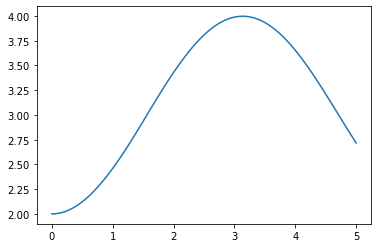

In [4]:
import matplotlib.pyplot as plt
plt.plot(soln.t,soln.y[0])

## Curve fitting 
Quite often the experimental observations that we get are a set of discrete data points and its not quite clear what relation the data points are following. In such cases we can make a guess at the type of function the data points may represent by using some theoretical background, or just by observing the general parameters. We can try to fit the data set to our guess to find the exact parameters of the function/equation. This is called curve fitting and is very useful in analysing discrete data sets.

Lets try to see how it works by artificially generating noisy dataset.

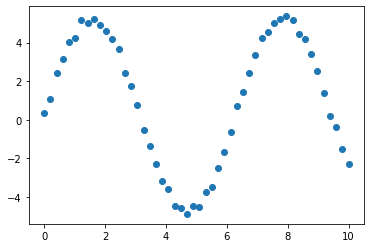

In [5]:
from scipy.optimize import curve_fit as cf
xdata=np.linspace(0, 10, 50)
ydata=5*np.sin(xdata)+0.5*np.random.random(50)
plt.scatter(xdata,ydata)

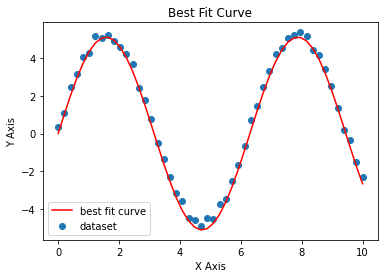

[5.11228067 0.99730027]


In [6]:
#defining the expected function
def f(x,A,f):
    return A*np.sin(f*x)

param, cov = cf(f,xdata,ydata)
#param contains the parameter values (in our case (A,f)) while cov contains the covariance
plt.scatter(xdata,ydata,label='dataset')
plt.plot(xdata,f(xdata,*param),'r',label='best fit curve')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title('Best Fit Curve')
plt.legend()
plt.show()
print(param)

The amplitude and frequency of 5.11 and 0.99 are close to the expected values but still not close enough. Lets see what happens when we increase the number of points

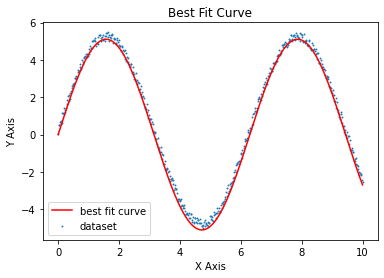

[5.10625141 0.9980817 ]


In [7]:
xdata=np.linspace(0, 10, 500)
ydata=5*np.sin(xdata)+0.5*np.random.random(500)
param, cov = cf(f,xdata,ydata)
plt.scatter(xdata,ydata,s=0.8,label='dataset')
plt.plot(xdata,f(xdata,*param),'r',label='best fit curve')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title('Best Fit Curve')
plt.legend()
plt.show()
print(param)

## Interpolation
Interpolation is another technique which is used to analyse discrete datasets. It is a technique to approximate discrete dataset with a continuous function which passes through all the points of the discrete dataset. Interpolation is different from curve fitting as the best fit curve does not pass through all the original points. Curve fitting is useful when we expect the data to follow a certain pattern while interpolation is useful otherwise.

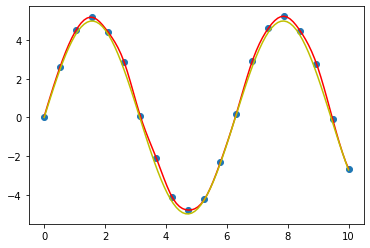

In [8]:
from scipy.interpolate import interp1d
xdata=np.linspace(0, 10,20)
ydata=5*np.sin(xdata)+0.5*np.random.random(20)
y=interp1d(xdata, ydata,kind='cubic') #we can use linear,quadratic,cubic or spline interpolation
# we can also use an extra parameter fill_value='extrapolate' to extrapolate the function outside of the given x range
plt.scatter(xdata,ydata)
plt.plot(np.linspace(0,10,100),y(np.linspace(0,10,100)),'r')
plt.plot(np.linspace(0,10,100),5*np.sin(np.linspace(0,10,100)),'y')
plt.show()

We can see that the interpolated function is different from the expected values. Lets try increasing the number of points.

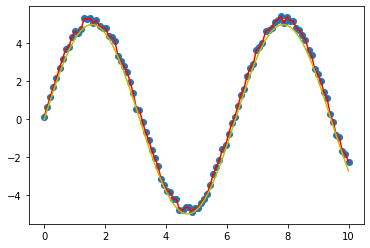

In [9]:
from scipy.interpolate import interp1d
xdata=np.linspace(0, 10,100)
ydata=5*np.sin(xdata)+0.5*np.random.random(100)
y=interp1d(xdata, ydata,kind='cubic') #we can use linear,quadratic,cubic or spline interpolation
plt.scatter(xdata,ydata)
plt.plot(np.linspace(0,10,100),y(np.linspace(0,10,100)),'r')
plt.plot(np.linspace(0,10,100),5*np.sin(np.linspace(0,10,100)),'y')
plt.show()

Lets put curve fitting to actual use. This time we analyse experimental data (which again I got from the experiments I performed in PHY224!) for fresenel's equations and find out the refractive index of the medium using curve fitting. Fresnel's equations are a set of equations which relate the reflected and transmitted intensity of light to the polarization and angle of incidence.
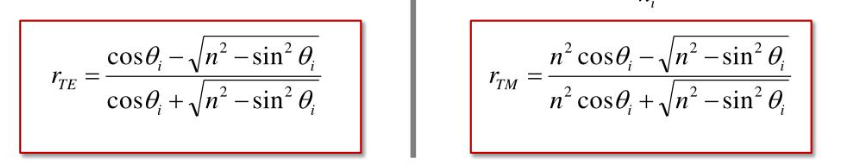

[1.46493178]
[1.95735149]


<ipython-input-10-e7046b0ef248>:2: RuntimeWarning: invalid value encountered in sqrt
  return ((np.cos(x)-(n*n-(np.sin(x))**2)**0.5)/(np.cos(x)+(n*n-(np.sin(x))**2)**0.5))**2


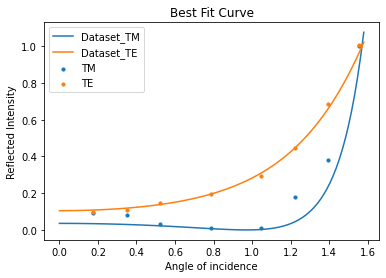

In [10]:
def r_te(x,n):
    return ((np.cos(x)-(n*n-(np.sin(x))**2)**0.5)/(np.cos(x)+(n*n-(np.sin(x))**2)**0.5))**2
def r_tm(x,n):
    return ((n*n*np.cos(x)-(n*n-(np.sin(x))**2)**0.5)/(n*n*np.cos(x)+(n*n-(np.sin(x))**2)**0.5))**2
x_data=np.asarray([10,20,30,45,60,70,80,89])
x_data=x_data*np.pi/180

#TM data
intensity=np.asarray([247,223,82,27,32,480,1030,2700]) #intensity measurements
intensity=intensity/2700 #normalising the intensity
p_opt, p_cov = cf(r_tm,x_data,intensity)
print(p_opt)
x_l=np.linspace(0,1.58,100)
plt.scatter(x_data,intensity,s=10, label='TM')
plt.plot(x_l,r_tm(x_l,p_opt), label='Dataset_TM')

#TE data
intensity_te=np.array([276,312,432,573,857,1289,1981,2915]) #intensity measurements
intensity_te=(intensity_te)/2900 #normalising the intensity
plt.scatter(x_data,intensity_te,s=10, label='TE')
p_opt, p_cov = cf(r_te,x_data,intensity_te)
plt.plot(x_l,r_te(x_l,*p_opt), label='Dataset_TE')
print(p_opt)


plt.ylabel("Reflected Intensity")
plt.xlabel("Angle of incidence")
plt.title('Best Fit Curve')
plt.legend()
plt.show()

The large variation shows that the experimental data was bad :').

Curve fitting is highly useful and helpful. I personally used it countless times in PHY224 and PHY101 labs, and would probably use more in future.

Lets now try to verify Malus' law which relates the intensity of light passing through two polarisers to the angle between the polarisers.

[136.1170615]


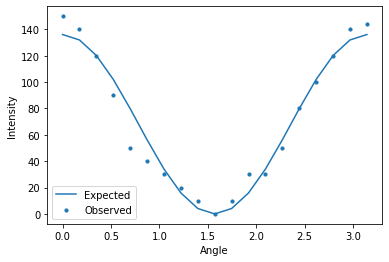

In [11]:
x_data=np.array([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180])
x_data=x_data*np.pi/180
i_data=np.array([30,29,27,24,20,19,18,17,16,15,16,18,18,20,23,25,27,29,29.4]) #observed intensities
#note that the minima here is not 0 which is because the surround light hence we need to adjust the intensity data
i_data=10*i_data-150
plt.scatter(x_data,i_data,s=10, label='Observed')
def f(x,a):
         return a*(np.cos(x))**2
p_opt, p_cov = cf(f,x_data,i_data)    
print(p_opt)
plt.plot(x_data,f(x_data,*p_opt), label='Expected')
plt.ylabel("Intensity")
plt.xlabel("Angle")
plt.legend()
plt.show()

## Root solving 
Lets now look at built-in SciPy functions to solve roots of 1 variable equations, and also simultaneous equations.

In [12]:
from scipy.optimize import root
def f(x):
    return x*x-5*x+6

#The equation will have 2 roots so 2 initial guesses need to be provided
val=root(f,[0,4])
print(val.x)

[2. 3.]


In [13]:
#solving a system of linear equations
def f(x):
    return [2*x[0]-3*x[1]+7, 3*x[0]-2*x[1]-17]
val=root(f,[0,0])
print(val.x)

[13. 11.]
